In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

## Data Processing

In [3]:
# loading MNIST dataset
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

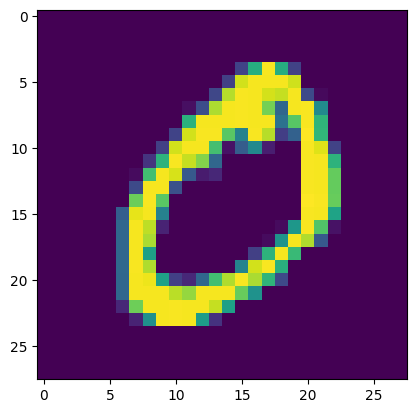

In [6]:
import matplotlib.pyplot as plt

# Checking the image
plt.imshow(X_train[1])

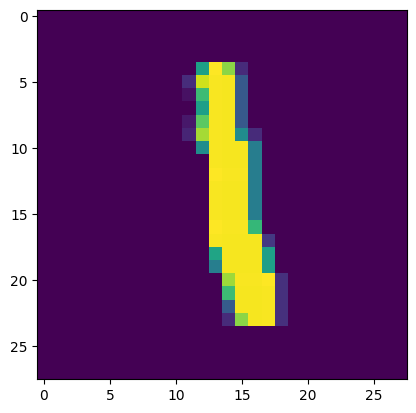

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[6])

In [8]:
# Normalize pixel values to the range [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

In [9]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

## Model Creation

In [10]:
# defining model
model= Sequential()
model.add(Flatten(input_shape=(28,28))) # converts 2D input into a 1D vector.
model.add(Dense(128, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(11,activation='softmax'))
model.summary()

/Users/sultan/Projects/handwritten-digit-recognition/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11)             │           363 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,971 (410.04 KB)

 Trainable params: 104,971 (410.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy']) # Compiling the model: defining the loss function, optimizer, and evaluation metric
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8482 - loss: 0.5245 - val_accuracy: 0.9588 - val_loss: 0.1449
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9611 - loss: 0.1319 - val_accuracy: 0.9675 - val_loss: 0.1077
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9741 - loss: 0.0839 - val_accuracy: 0.9700 - val_loss: 0.0990
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9798 - loss: 0.0645 - val_accuracy: 0.9681 - val_loss: 0.1054
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9853 - loss: 0.0464 - val_accuracy: 0.9692 - val_loss: 0.1036
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9873 - loss: 0.0395 - val_accuracy: 0.9747 - val_loss: 0.0934
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9894 - loss: 0.0328 - val_accuracy: 0.9747 - val_loss: 0.0901
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9920 - loss: 0.0251 - 

In [12]:
y_prob = model.predict(X_test) # probability distribution
y_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step


array([[4.4251085e-14, 7.8866147e-16, 3.5359428e-20, ..., 6.4009009e-15,
        2.7389876e-06, 1.0118011e-21],
       [4.9787130e-22, 3.0237056e-12, 1.0000000e+00, ..., 1.0760391e-25,
        0.0000000e+00, 0.0000000e+00],
       [8.0421457e-17, 9.9999928e-01, 6.1391034e-07, ..., 2.1337228e-09,
        2.1796940e-17, 3.9463660e-21],
       ...,
       [6.3756328e-27, 3.4414661e-14, 2.0750558e-30, ..., 1.5608700e-16,
        1.6208618e-11, 1.5971560e-28],
       [1.5918695e-20, 3.5235553e-24, 9.9545479e-31, ..., 6.9481945e-07,
        1.4130554e-18, 2.2698860e-27],
       [1.6573388e-18, 8.1629078e-25, 9.3957387e-32, ..., 1.4678005e-25,
        8.9591362e-28, 0.0000000e+00]], dtype=float32)

In [13]:
y_pred = y_prob.argmax(axis=1) # prediction
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9766

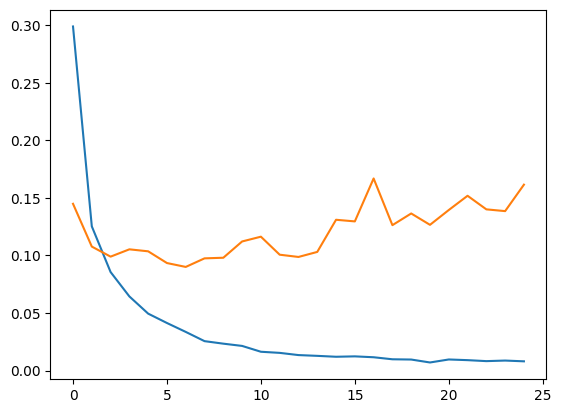

In [15]:
# plotting training loss and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

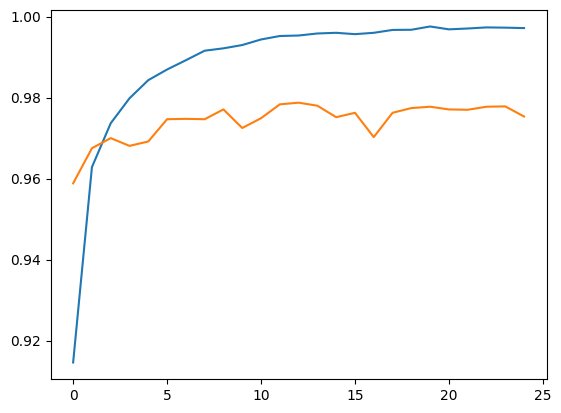

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

## Custom Testing Process

In [28]:
import numpy as np
from PIL import Image

def preprocess_image(image_path, invert=False):
    img = Image.open(image_path).convert('L')
    if(img): print("Image Found")
    img = img.resize((28, 28), Image.Resampling.LANCZOS) # Resize image to 28x28 pixels (if not already)
    img_array = np.array(img)
    
    if invert:
        img_array = 255 - img_array
    
    img_array = img_array / 255.0 # Normalize pixel values to the range [0, 1]
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array

In [29]:
image_path = "digit.png"

processed_img = preprocess_image(image_path, invert=False)


Image Found


In [30]:
processed_img.shape

(1, 28, 28)

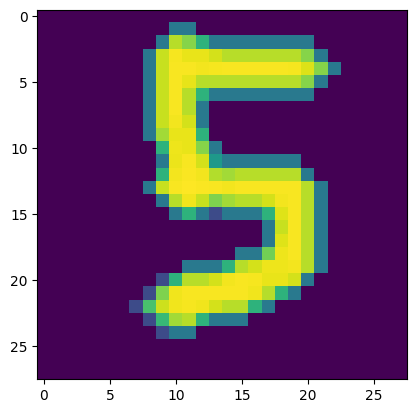

In [31]:
plt.imshow(np.squeeze(processed_img))

In [33]:
test_prob = model.predict(processed_img)
test_prob

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[1.1751640e-37, 2.2196405e-13, 2.7074803e-28, 5.9708704e-21,
        5.2493497e-37, 1.0000000e+00, 1.3357825e-21, 1.2365724e-26,
        7.3028409e-20, 1.5601413e-19, 0.0000000e+00]], dtype=float32)

In [34]:
test_pred = test_prob.argmax(axis=1)
test_pred

array([5])

## Exporting Model

In [35]:
model.save('my_model.h5')